# Neural Network: Predicting Player Market Values

## What is a Neural Network?
A neural network is a powerful machine learning model that can capture complex non-linear relationships between features. It works by:
1. Processing inputs through multiple layers of neurons
2. Learning hierarchical representations of the data
3. Using backpropagation to optimize weights

## Our Task
We'll use a neural network to predict player market values based on their attributes. This regression task will demonstrate how neural networks can capture complex relationships that our linear regression model couldn't handle effectively.


## Implementation

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def d_sigmoid(z):
    s = sigmoid(z)
    return s * (1 - s)

def MSE(W, B, X, y):
    total_error = 0
    for xi, yi in zip(X, y):
        _, A = forward_pass(W, B, xi)
        L = len(A) - 1  # get output layer index
        total_error += 0.5 * (A[L] - yi) ** 2
    return total_error / len(X)


def initialize_weights(layers):
    W = dict()
    B = dict()
    for i in range(1, len(layers)):
        W[i] = np.random.randn(layers[i], layers[i-1]) * np.sqrt(2.0 / layers[i-1])
        B[i] = np.zeros((layers[i], 1))
    return W, B

def forward_pass(W, B, x):
    Z = dict()
    A = dict()
    A[0] = x.reshape(-1, 1)
    for i in range(1, len(W) + 1):
        Z[i] = W[i] @ A[i-1] + B[i]
        A[i] = sigmoid(Z[i])
    return Z, A

class DenseNetwork:
    def __init__(self, layers=[4, 8, 1]):
        self.layers = layers
        self.W, self.B = initialize_weights(layers=self.layers)

    def train(self, X_train, y_train, alpha=0.01, epochs=50):
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")
        L = len(self.layers) - 1
        for k in range(epochs):
            for xi, yi in zip(X_train, y_train):
                Z, A = forward_pass(self.W, self.B, xi)
                deltas = dict()
                deltas[L] = (A[L] - yi) * d_sigmoid(Z[L])
                for i in range(L-1, 0, -1):
                    deltas[i] = (self.W[i+1].T @ deltas[i+1]) * d_sigmoid(Z[i])
                for i in range(1, L+1):
                    self.W[i] -= alpha * deltas[i] @ A[i-1].T
                    self.B[i] -= alpha * deltas[i]
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))
            print(f"{k+1}-Epoch Cost = {self.errors_[-1]}")

    def predict(self, xi):
        _, A = forward_pass(self.W, self.B, xi)
        return A[len(self.layers)-1][0][0]


## Understanding Our Dataset
Let's examine the key attributes we'll use to predict player market values:
- Overall Rating (primary indicator of player quality)
- Key Performance Stats (pace, shooting, passing, dribbling, defending, physical)
- Age (younger players often have higher market value potential)
- League Level (lower level leagues usually have lower bargaining power)
- potential (high potential players are worth more)

Unlike linear regression, our neural network can capture non-linear relationships between these features and market value, potentially leading to better predictions.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

players_df = pd.read_csv("../data/players_data.csv")
features = ["overall", "age", "league_level", "club_contract_valid_until_year", 
"potential"]

filtered_df = players_df.dropna(subset=features + ['value_eur'])
X = filtered_df[features].values
y = filtered_df['value_eur'].values

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.4, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (10950, 5)
Test set shape: (7300, 5)


/var/folders/pz/s1ggtx853xx_qxny9g89ffgm0000gn/T/ipykernel_79781/763853354.py:4: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv("../data/players_data.csv")


## Model Training

In [33]:
sns.set_theme()
net = DenseNetwork(layers=[len(features), 32, 8, 1])
net.train(X_train, y_train, alpha=0.01, epochs=50)


Starting Cost = [[0.70649772]]
1-Epoch Cost = [[0.36950198]]
2-Epoch Cost = [[0.35094777]]
3-Epoch Cost = [[0.34629395]]
4-Epoch Cost = [[0.34429257]]
5-Epoch Cost = [[0.34319849]]
6-Epoch Cost = [[0.3425135]]
7-Epoch Cost = [[0.34204602]]
8-Epoch Cost = [[0.34170758]]
9-Epoch Cost = [[0.34145182]]
10-Epoch Cost = [[0.34125217]]
11-Epoch Cost = [[0.34109229]]
12-Epoch Cost = [[0.34096159]]
13-Epoch Cost = [[0.34085289]]
14-Epoch Cost = [[0.34076118]]
15-Epoch Cost = [[0.34068282]]
16-Epoch Cost = [[0.34061515]]
17-Epoch Cost = [[0.34055614]]
18-Epoch Cost = [[0.34050423]]
19-Epoch Cost = [[0.3404582]]
20-Epoch Cost = [[0.34041711]]
21-Epoch Cost = [[0.34038017]]
22-Epoch Cost = [[0.34034677]]
23-Epoch Cost = [[0.34031639]]
24-Epoch Cost = [[0.34028861]]
25-Epoch Cost = [[0.34026309]]
26-Epoch Cost = [[0.34023954]]
27-Epoch Cost = [[0.34021771]]
28-Epoch Cost = [[0.34019739]]
29-Epoch Cost = [[0.34017841]]
30-Epoch Cost = [[0.34016062]]
31-Epoch Cost = [[0.34014389]]
32-Epoch Cost = [[0

## Training Progress
Let's visualize how our model's error changes during training.


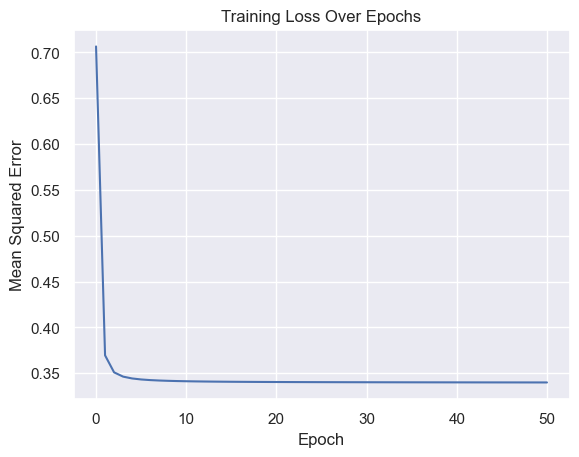

[0.7064977181210051, 0.36950198088379455, 0.3509477742998895, 0.3462939540813452, 0.3442925671993184, 0.3431984925474399, 0.3425134993032151, 0.3420460215364093, 0.3417075756751531, 0.3414518212198826, 0.34125217276998215, 0.34109229232550786, 0.340961587175632, 0.3408528893748206, 0.3407611759248183, 0.340682823015888, 0.3406151512679798, 0.3405561376341912, 0.3405042268366566, 0.34045820440075364, 0.34041710900373323, 0.340380170603893, 0.34034676588878704, 0.3403163856148418, 0.34028861027545354, 0.3402630917091986, 0.34023953901561954, 0.34021770764255616, 0.34019739084119605, 0.34017841291111833, 0.34016062381422935, 0.34014389484643415, 0.3401281151344636, 0.3401131887819005, 0.3400990325300571, 0.3400855738301465, 0.34007274924610903, 0.34006050312499114, 0.340048786485043, 0.3400375560819002, 0.3400267736211825, 0.34001640509201797, 0.3400064202009598, 0.3399967918894711, 0.3399874959213694, 0.3399785105290249, 0.3399698161090373, 0.33996139495978306, 0.3399532310545053, 0.3399

In [34]:
errors = np.array(net.errors_).flatten().tolist()
plt.plot(errors)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

print(np.array(net.errors_).flatten().tolist())

## Model Performance Evaluation

Let's plot the actual vs predicted market values to see how our neural network performs compared to the linear regression model.

Honestly, I expected a bigger improvement. But, the neural network is still better at predicting the market value of players than the linear regression model.

Looking at the graph, the network starts to perform poorly just when dealing with high rated players. The data at that point is very non-comforming as opposed to lower valued players. There are different behaviors on the two sides. I thought the network would pick up on this though.

There is also less data within that range since the number of really high rated players is small. This might actually be the deciding factor. I believe >60% of the dataset falls below the appropriate threshold.



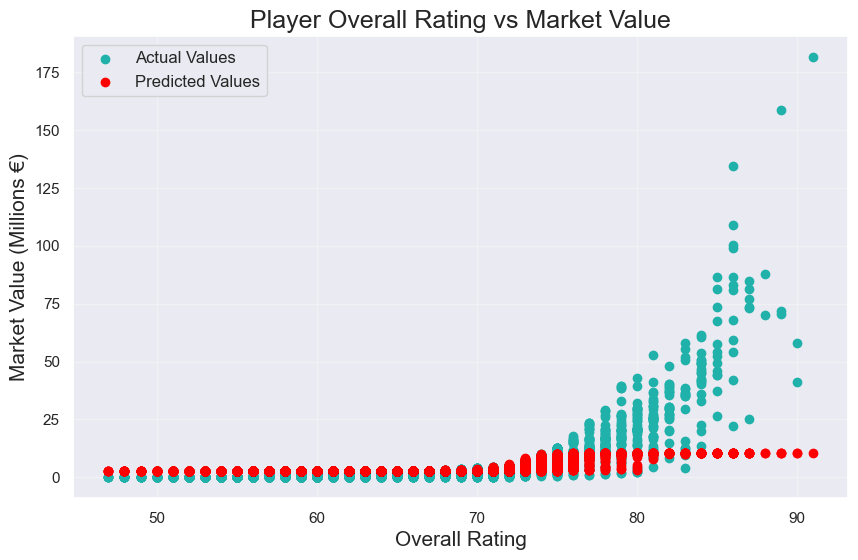

In [35]:
plt.figure(figsize=(10, 6))
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
X_test_original = scaler_X.inverse_transform(X_test)
overall_ratings = X_test_original[:, 0]
y_test_millions = y_test_original / 1_000_000

plt.scatter(overall_ratings, y_test_millions, color='lightseagreen', label='Actual Values')
y_pred = np.array([net.predict(xi) for xi in X_test])
y_pred_millions = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel() / 1_000_000
plt.scatter(overall_ratings, y_pred_millions, color='red', label='Predicted Values')

plt.xlabel('Overall Rating', fontsize=15)
plt.ylabel('Market Value (Millions €)', fontsize=15)
plt.title('Player Overall Rating vs Market Value', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()
